# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set plot style
plt.style.use('seaborn')

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [3]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv"
titanic = pd.read_csv(url)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [5]:
titanic.set_index("PassengerId", inplace = True)

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

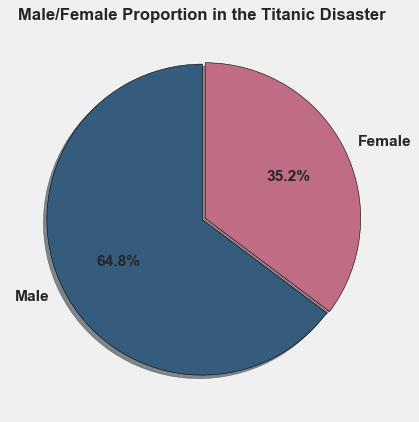

In [70]:
gender = titanic["Sex"].value_counts().reset_index()

# plot data
slices = gender["Sex"]
# capitalize 
labels = gender["index"].apply(lambda x:x.capitalize())
colors = ["#355C7D", "#C06C84"]
#slides emphasizes, 0 is none
explode = [0, 0.02]


#pie plot
plt.pie(slices, labels = labels, explode = explode, shadow = True, colors = colors,
        startangle = 90, autopct = "%1.1f%%", textprops={'fontsize': 14, "fontweight":"bold"},
        wedgeprops = {"edgecolor": "black"})

plt.title("Male/Female Proportion in the Titanic Disaster", fontsize = 15, fontweight = "bold")
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

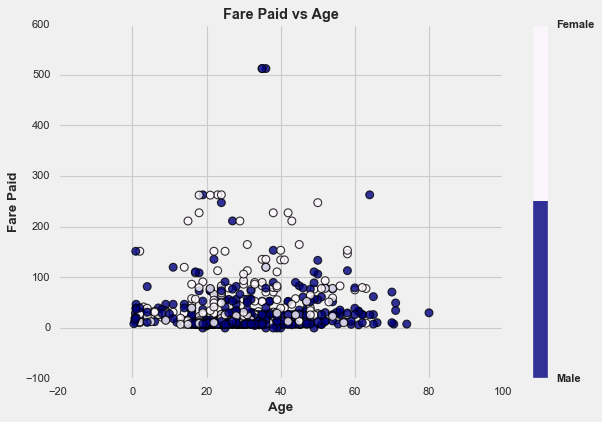

In [80]:
plt.style.use('fivethirtyeight')
# make gender to numeric data, 0 is male, 1 is female
gender_lst = [0 if item == "male" else 1 for item in titanic["Sex"] ]

# plot data
y = titanic["Fare"]
x = titanic["Age"]

# colors according to age
colors = gender_lst


# create scatter plot over x, y
# dot sieze, color, markers style, edgecolor, edgeline width, 
# alpha is how transparent it is,
# cmap is map of colors, 
plt.scatter(x, y, s = 50, c = colors, cmap = plt.cm.get_cmap("gist_ncar",2), 
            edgecolor= "black", linewidth = 1, alpha = 0.8)


# add title
plt.ylabel("Fare Paid", fontsize = 12, fontweight = "bold")
plt.xlabel("Age", fontsize = 12, fontweight = "bold")
plt.title("Fare Paid vs Age", fontsize = 13, fontweight = "bold")




#reference color bar:
# get rid of the warnning on autoremove grid
plt.rcParams['axes.grid'] = False
#set color bar
cbar = plt.colorbar()

# set how many number to displace in color map bar
cbar.set_ticks([0,1])
# set color map bar labels
cbar.set_ticklabels(["Male", "Female"],fontsize = 13, fontweight = "bold")
# set color map bar label size
cbar.ax.tick_params(labelsize = 10)

plt.tight_layout()
plt.show()

### Step 7. How many people survived?

In [81]:
titanic["Survived"].sum()

342

### Step 8. Create a histogram with the Fare payed

In [85]:
fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

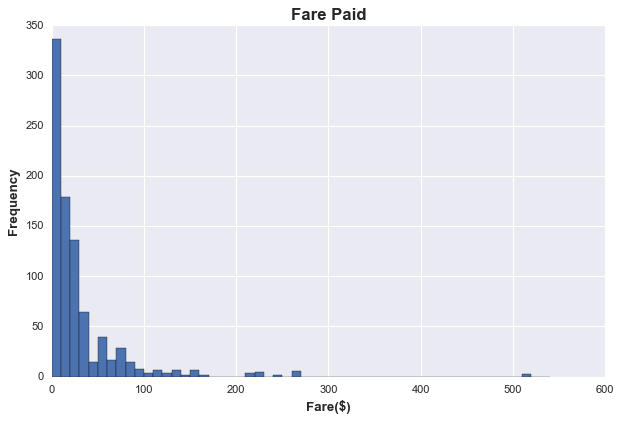

In [99]:
plt.style.use('seaborn')
fare = titanic["Fare"] # fare paid
bins = np.arange(0, 550, 10)

plt.hist(fare, bins = bins, edgecolor = "black")

plt.title('Fare Paid', fontsize = 15, fontweight = "bold")
plt.xlabel('Fare($)',fontsize = 12, fontweight = "bold")
plt.ylabel('Frequency',fontsize = 12, fontweight = "bold")

plt.tight_layout()

plt.show()

### BONUS: Create your own question and answer it.

In [116]:
# survival with respect to age groups: age by intervals of 10 suvived 
ages = titanic.groupby(by = "Age")
age_sur = ages["Survived"].sum().reset_index()
bins = np.arange(0,80,10)
age_sur_grp = age_sur.groupby(pd.cut(age_sur["Age"], bins))
age_gry = age_sur_grp[["Survived"]].sum().reset_index()
age_gry

,Age,Survived
0,"(0, 10]",38
1,"(10, 20]",44
2,"(20, 30]",84
3,"(30, 40]",69
4,"(40, 50]",33
5,"(50, 60]",17
6,"(60, 70]",4


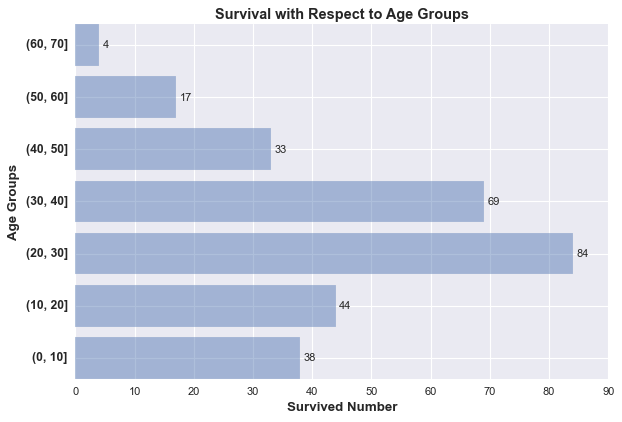

In [126]:
# survival with respect to age groups: age by intervals of 10 suvived 
ages = titanic.groupby(by = "Age")
age_sur = ages["Survived"].sum().reset_index()
bins = np.arange(0,80,10)
age_sur_grp = age_sur.groupby(pd.cut(age_sur["Age"], bins))
age_gry = age_sur_grp[["Survived"]].sum().reset_index()

######################
# plot bar chart
ages = age_gry["Age"].astype(str)
age_sur = age_gry["Survived"]

# horizontal bar
bars = plt.barh(ages, age_sur, alpha = 0.45)

# add values on bars, padding is distance from bars
plt.bar_label(container = bars, labels = age_sur, padding = 3, fontsize = 10)

# add title, switch x, y compare to vertical bars
plt.title("Survival with Respect to Age Groups", fontsize = 13, fontweight = "bold")
plt.ylabel("Age Groups", fontsize = 12, fontweight = "bold")
plt.xlabel("Survived Number", fontsize = 12, fontweight = "bold")

# adjust y axis label 
plt.yticks(fontsize = 11, fontweight = "bold")

plt.tight_layout()
plt.show()